In [168]:
import os, sys
!pip install pandas
!pip install pytabix

In [169]:
import pandas as pd
import tabix
import matplotlib.pyplot as plt

In [188]:
df = pd.read_csv("https://ftp.ncbi.nih.gov/snp/temp/Demo_Data/ClinVarSNP_Demo3.csv")

In [189]:
#convert snp_id to int
df.info()
df['SNP_ID'] = df['SNP_ID'].astype(int)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41994 entries, 0 to 41993
Data columns (total 10 columns):
CHR_ACC       41994 non-null object
CHR           41994 non-null object
POS           41994 non-null float64
SNP_ID        41994 non-null int64
MAF_1000G     6069 non-null float64
MAF_ExAC      30551 non-null float64
MAF_TOPMED    24221 non-null float64
MAF_ESP       9573 non-null float64
GENE          41994 non-null object
GENE_GROUP    41994 non-null object
dtypes: float64(5), int64(1), object(4)
memory usage: 3.2+ MB


In [190]:
df.head()

,CHR_ACC,CHR,POS,SNP_ID,MAF_1000G,MAF_ExAC,MAF_TOPMED,MAF_ESP,GENE,GENE_GROUP
0,NC_000008.11,8,19956018.0,268,0.005190,0.013400,0.010910,0.013378,LPL,CGD
1,NC_000008.11,8,19956018.0,268,0.005190,0.013400,0.010910,0.013378,LPL,CLINVAR
2,NC_000008.11,8,19956018.0,268,0.005190,0.013400,0.010910,0.013378,LPL,GTR
3,NC_000011.10,11,5227002.0,334,0.027356,0.004384,0.058239,0.013771,HBB,CGD
4,NC_000011.10,11,5230000.0,334,0.027356,0.004384,0.058239,0.013771,HBB,CLINVAR


In [173]:
df.GENE_GROUP.value_counts()

CLINVAR          12005
GTR              11764
CGD              11045
INVITAE           3399
COSMIC            1442
PMID:26627737     1214
ACMG              1143
Name: GENE_GROUP, dtype: int64

In [191]:
#get subset of variants in ACMG genes with TOPMED MAF
acmg_var =  df.loc[(df['GENE_GROUP'] == 'ACMG') & (df['MAF_TOPMED'] > 0) ]

In [192]:
#get total  counts
print ("ACMG variant counts = ", acmg_var.shape[0])
acmg_var.head()

ACMG variant counts =  376


,CHR_ACC,CHR,POS,SNP_ID,MAF_1000G,MAF_ExAC,MAF_TOPMED,MAF_ESP,GENE,GENE_GROUP
385,NC_000005.10,5,112839514.0,1801155,NaN,NaN,0.001298,0.001077,APC,ACMG
453,NC_000003.12,3,38600000.0,1805124,0.230000,0.222000,0.245421,0.246276,SCN5A,ACMG
477,NC_000002.12,2,47800000.0,2020912,0.003994,0.005278,0.004285,0.005459,MSH6,ACMG
577,NC_000011.10,11,47300000.0,2856655,NaN,0.000017,0.000024,NaN,MYBPC3,ACMG
612,NC_000014.9,14,23425316.0,3218716,NaN,0.000033,0.000032,0.000077,MYH7,ACMG


In [193]:
#SNP counts by CHR and GENE
acmg_var.groupby(['CHR', 'GENE']).size()

CHR  GENE  
1    LMNA       7
     MUTYH     31
     RYR2       1
     SDHB       6
     SDHC       2
     TNNT2      5
10   RET        8
11   KCNQ1     18
     MEN1       1
     MYBPC3    26
     SDHD       3
12   MYL2       2
     PKP2      13
13   ATP7B     19
     BRCA2     29
     RB1        2
14   MYH7      17
16   MYH11      1
     TSC2       2
17   BRCA1     25
     TP53      12
18   DSC2       2
     DSG2       3
     SMAD4      1
19   LDLR       9
     RYR1      22
     TNNI3      5
2    APOB       4
     COL3A1     1
     MSH2       2
     MSH6       8
3    MLH1       2
     MYL3       2
     SCN5A     36
     TGFBR2     2
     TMEM43     1
     VHL        3
5    APC        4
6    DSP        4
7    KCNH2      8
     PMS2      19
X    GLA        4
     OTC        4
dtype: int64

In [194]:
# Open a remote or local VCF file.
#url = "ftp://ftp.ncbi.nih.gov/snp/pre_build152/organisms/human_9606_b151_GRCh38p7/VCF/00-All.vcf.gz" # dbSNP old build 151
url ="ftp://ftp.ncbi.nih.gov/snp/latest_release/VCF/GCF_000001405.38.bgz" #dbSNP build 152
tb = tabix.open(url)

In [196]:
# query VCF for the top 5 rows [0:5]
for i in range(acmg_var.iloc[0:5].shape[0]):
    # For printing more than one columns
    ichr = acmg_var.iloc[i,[0]]
    ipos = acmg_var.iloc[i,[2]]
    q = ichr['CHR_ACC'] + ':' + str(ipos['POS']) + '-' + str(ipos['POS'])
    records = tb.querys(q)
    # Each record is a list of strings.
    for record in records:
        print(record[:9])

['NC_000005.10', '112839510', 'rs1064794229', 'GAAATA', 'G', '.', '.', 'RS=1064794229;dbSNPBuildID=150;SSR=0;GENEINFO=APC:324;VC=INDEL;PUB;NSF;CLNVI=.,;CLNORIGIN=.,1;CLNSIG=.,5|0;CLNDISDB=.,MedGen:CN517202|MedGen:CN169374;CLNDN=.,not_provided|not_specified;CLNREVSTAT=.,single|single;CLNACC=.,RCV000485674.2|RCV000501734.2;CLNHGVS=NC_000005.10:g.112839511_112839518AAATAAAA=,NC_000005.10:g.112839514_112839518delTAAAA']
['NC_000005.10', '112839510', 'rs1463038513', 'GAAAT', 'G', '.', '.', 'RS=1463038513;dbSNPBuildID=151;SSR=0;GENEINFO=APC:324;VC=INDEL;NSF;GNO;FREQ=TOPMED:.,7.964e-06']
['NC_000005.10', '112839514', 'rs1801155', 'T', 'A', '.', '.', 'RS=1801155;dbSNPBuildID=130;SSR=0;GENEINFO=APC:324;VC=SNV;PUB;NSM;GNO;FREQ=ALSPAC:0.9997,0.0002595|Estonian:0.9998,0.0002232|ExAC:0.9983,0.001693|GnomAD:0.9992,0.0008078|TOPMED:0.9987,0.001298|TWINSUK:0.9987,0.001348;CLNVI=.,OMIM:611731.0029|UniProtKB:P25054#VAR_005049;CLNORIGIN=.,0|1|1073741825;CLNSIG=.,9|9|9/255|0|9/255|12|9|9|0;CLNDISDB=.,.|Ge

['NC_000002.12', '47800000', 'rs377356882', 'C', 'G', '.', '.', 'RS=377356882;dbSNPBuildID=138;SSR=0;GENEINFO=MSH6:2956;VC=SNV;NSM;GNO;FREQ=ExAC:1,1.65e-05|GnomAD:0.9999,6.463e-05|GnomAD_exomes:1,1.221e-05|GoESP:0.9998,0.0001538|TOPMED:1,1.593e-05;CLNVI=.,;CLNORIGIN=.,1;CLNSIG=.,0|0;CLNDISDB=.,MedGen:C0009405/Orphanet:443090|MedGen:C0027672;CLNDN=.,Hereditary_nonpolyposis_colon_cancer|Hereditary_cancer-predisposing_syndrome;CLNREVSTAT=.,single|mult;CLNACC=.,RCV000470045.3|RCV000491796.2;CLNHGVS=NC_000002.12:g.47800000C=,NC_000002.12:g.47800000C>G']
['NC_000014.9', '23425316', 'rs3218716', 'C', 'A,G,T', '.', '.', 'RS=3218716;dbSNPBuildID=106;SSR=0;GENEINFO=MYH7:4625;VC=SNV;PUB;NSM;GNO;FREQ=ExAC:1,.,.,3.296e-05|GnomAD_exomes:1,4.061e-06,.,2.03e-05|GoESP:0.9999,.,.,7.689e-05|TOPMED:1,.,.,3.186e-05;CLNVI=.,.,.,UniProtKB:P12883#VAR_004591;CLNORIGIN=.,.,.,0|1|8;CLNSIG=.,.,.,255|5|255|5|5|5|4;CLNDISDB=.,.,.,GeneReviews:NBK1768/Genetic_Testing_Registry_(GTR):GTR000500683/MedGen:C0949658/OMIM:P

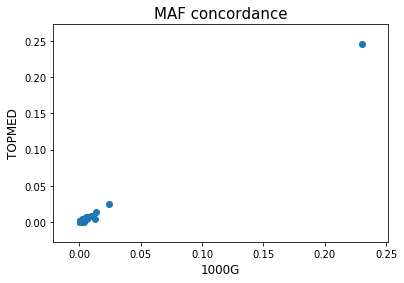

In [179]:
#plot ACMG variants MAF from 1000G and TopMed
fig, ax = plt.subplots()
ax.scatter(acmg_var['MAF_1000G'], acmg_var['MAF_TOPMED'])

ax.set_xlabel('1000G', fontsize=12)
ax.set_ylabel('TOPMED', fontsize=12)
ax.set_title('MAF concordance', fontsize=15)

plt.show()